- [Experimentos: _Horizontal Visibility Graph_](#exp1)
  * [Estudio de la distribución $P(K)$ por grado del _Horizontal Visibility Graph: $sen$ y ruido blanco_](#pk)
  * [Crecimiento de la longitud de camino por el número de nodos](#len)
  * [Estudio de medidas de centralidad para series periodicas y de ruido](#cent)
- [HVG $\subset$ GAF](#hvgingaf)

In [1]:
from src.gramian.gramian import GramianAngularField
from src.visibility.horizontal.hvg import HorizontalVisibilityGraph
from src.utils.Utilities import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

/home/cperezln/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Declaración de funciones particulares de estos experimentos

In [2]:
def show_deg_dist(periodic, noise, comb):
    # Distribución de grado del seno
    lsSin = [HorizontalVisibilityGraph.fillsFromTimeSeries(i).nx for i in [periodic]]
    degreesSin = [[d for n, d in g.degree()] for g in lsSin]
    degreesSin = [item for row in degreesSin for item in row]
    counts1, bins1 = np.histogram(degreesSin)
    # Distribución del grado de las series de ruido declaradas previamente
    lsRandom = [HorizontalVisibilityGraph.fillsFromTimeSeries(i).nx for i in noise]
    degreesRandom = [[d for n, d in g.degree()] for g in lsRandom]
    degreesRandom = [item for row in degreesRandom for item in row]
    counts2, bins2 = np.histogram(degreesRandom)
    # Distribución del grado de la combinación de las anteriores
    lsComb = [HorizontalVisibilityGraph.fillsFromTimeSeries(i).nx for i in comb]
    degreesComb = [[d for n, d in g.degree()] for g in lsComb]
    degreesComb = [item for row in degreesComb for item in row]
    counts3, bins3 = np.histogram(degreesComb)
    # Dibujo con matplotlib
    f, (axh1, axh2, axh3) = plt.subplots(2, 3)
    f.set_figheight(5)
    f.set_figwidth(18)
    axh1.hist(bins2[:-1], bins2, weights=(1/sum(counts2))*np.array(counts2), alpha=.7, color="#d7f01a")
    axh1.set_title("Gaussiano")
    axh2.hist(bins1[:-1], bins1, weights=(1/sum(counts1))*np.array(counts1), alpha=.7, color="blue")
    axh2.set_title("Seno")
    axh3.hist(bins3[:-1], bins3, weights=(1/sum(counts3))*np.array(counts3), alpha=.7, color="green")
    axh3.set_title("Combinación")
    return plt

In [3]:
def show_lenght_path(ini, fin):
    swps = [average_path_lenght(HorizontalVisibilityGraph.fillsFromTimeSeries(np.sin(np.linspace(0, 5*np.pi, i))).nx) for i in range(ini, fin)]
    swpr = [average_path_lenght(HorizontalVisibilityGraph.fillsFromTimeSeries(white_noise(i)).nx) for i in range(ini, fin)]
    swpc = [average_path_lenght(HorizontalVisibilityGraph.fillsFromTimeSeries(white_noise(i) + np.sin(np.linspace(0, 5*np.pi, i))).nx) for i in range(ini, fin)]
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax1.plot(range(ini, fin), swpr, alpha=.7, color="#d7f01a")
    ax1.set_title("Gaussiano")
    ax2.plot(range(ini, fin), swps, alpha=.7, color="blue")
    ax2.set_title("Seno")
    ax3.plot(range(ini, fin), swpc, alpha=.7, color="green")
    ax3.set_title("Combinación")

    return plt

In [4]:
def show_centrality(periodic, random, alpha, max_iter = 500):
    combination = periodic + alpha * random
    # Graph Declaration
    hvg1 = HorizontalVisibilityGraph.fillsFromTimeSeries(periodic).nx
    hvg2 = HorizontalVisibilityGraph.fillsFromTimeSeries(random).nx
    hvg3 = HorizontalVisibilityGraph.fillsFromTimeSeries(combination).nx
    # Centralities computation
    eigc1 = nx.eigenvector_centrality(hvg1, max_iter = max_iter)
    eigc2 = nx.eigenvector_centrality(hvg2, max_iter = max_iter)
    eigc3 = nx.eigenvector_centrality(hvg3, max_iter = max_iter)
    
    btwc1 = nx.betweenness_centrality(hvg1)
    btwc2 = nx.betweenness_centrality(hvg2)
    btwc3 = nx.betweenness_centrality(hvg3)
    
    clsc1 = nx.closeness_centrality(hvg1)
    clsc2 = nx.closeness_centrality(hvg2)
    clsc3 = nx.closeness_centrality(hvg3)
    # Drawing
    x = range(len(random))
    f, ((axk1, axk2, axk3), (ax1, ax2, ax3)) = plt.subplots(2, 3)
    f.set_figheight(7)
    f.set_figwidth(15)
    
    axk1.plot(x, periodic)
    axk1.set_title('Periódico')
    
    axk2.plot(x, random)
    axk2.set_title('Gaussiano')
    
    axk3.plot(x, combination)
    axk3.set_title('Combinación')
    
    ax1.plot(x, list(eigc1.values()), label = 'Eigenvector')
    ax1.plot(x, list(btwc1.values()), label = 'Betweenness')
    ax1.plot(x, list(clsc1.values()), label = 'Closeness')
    ax1.set_title('Periódico')
    ax1.legend()
    ax2.plot(x, list(eigc2.values()), label = 'Eigenvector')
    ax2.plot(x, list(btwc2.values()), label = 'Betweenness')
    ax2.plot(x, list(clsc2.values()), label = 'Closeness')
    ax2.set_title('Gaussiano')
    ax2.legend()
    ax3.plot(x, list(eigc3.values()), label = 'Eigenvector')
    ax3.plot(x, list(btwc3.values()), label = 'Betweenness')
    ax3.plot(x, list(clsc3.values()), label = 'Closeness')
    ax3.set_title('Combinación')
    ax3.legend()
    
    return plt

# Experimentos: _Horizontal Visibility Graph_ <a id='exp1'></a>

## Estudio de la distribución $P(K)$ por grado del _Horizontal Visibility Graph_: $sen$ y ruido blanco <a id='pk'></a>
En esta sección del notebook se pretende estudiar si se cumplen las propiedades vistas en el paper de Lacasa para series de ruido blanco (aleatorias) y el seno (periódico).En esta sección del notebook se pretende estudiar si se cumplen las propiedades vistas en el paper de Lacasa para series de ruido blanco (aleatorias) y el seno (periódico). De esta forma, tratamos de estudiar si el ruido blanco, el seno y la combinación de estos son redes de escala libre.

#### Experimento con $n = 100$ elementos en la serie temporal

In [5]:
# Se declara el seno
sen_periodic1 = np.sin(np.linspace(0, 5*np.pi, 100))

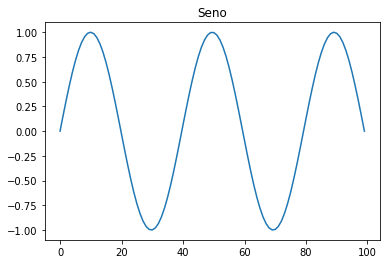

In [6]:
# Para esta discretización del dominio, el seno se ve de la siguiente forma
axse = plt.subplot(1, 1, 1)
axse.plot(sen_periodic1)
axse.set_title("Seno")
plt.plot()
plt.savefig("seno.jpg")

In [7]:
# Primera generación de ruido
random_ls1 = [white_noise(100) for _ in range(500)]
comb_ls1 = [sen_periodic1 + random_ls1[i]*0.3 for i in range(500)]

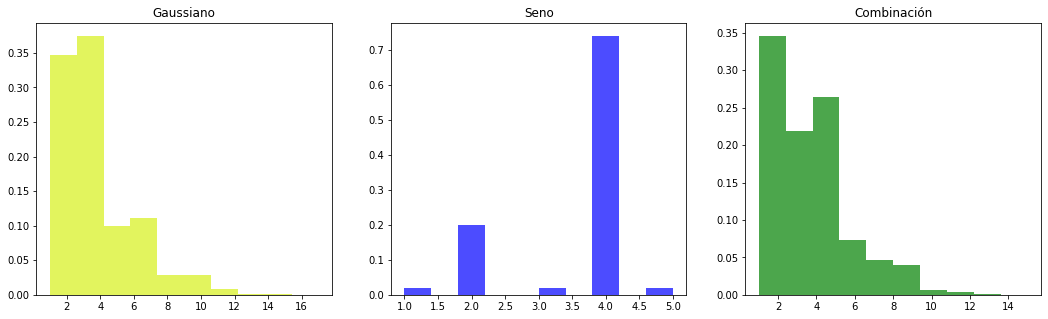

In [8]:
dist1 = show_deg_dist(sen_periodic1, random_ls1, comb_ls1)
dist1.savefig("assets/hvg/distb100.jpg", bbox_inches='tight')

#### Experimento con $n = 200$ elementos en la serie temporal

In [9]:
# Se declara el seno
sen_periodic2 = np.sin(np.linspace(0, 5*np.pi, 200))

In [10]:
# Segunda generación de ruido
random_ls2 = [white_noise(200) for _ in range(500)]
comb_ls2 = [sen_periodic2 + random_ls2[i]*0.3 for i in range(500)]

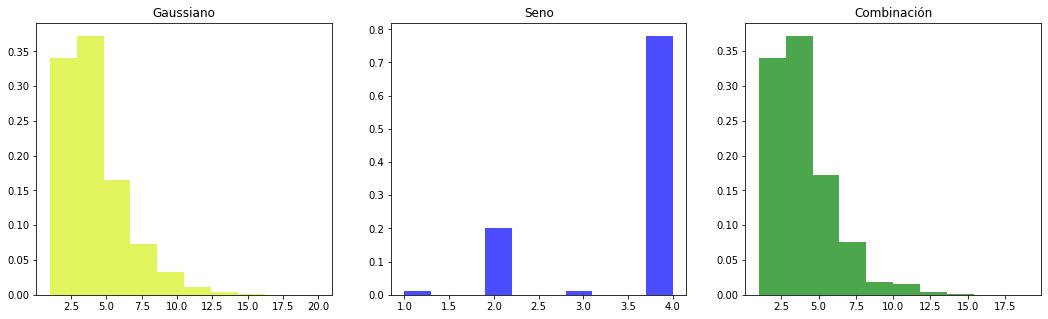

In [11]:
dist2 = show_deg_dist(sen_periodic2, random_ls2, comb_ls2)
dist2.savefig("assets/hvg/distb200.jpg", bbox_inches='tight')

#### Experimento con $n = 300$ elementos en la serie temporal

In [12]:
# Se declara el seno
sen_periodic3 = np.sin(np.linspace(0, 5*np.pi, 300))

In [13]:
# Tercera generación de ruido
random_ls3 = [white_noise(300) for _ in range(500)]
comb_ls3 = [sen_periodic3 + random_ls3[i]*0.3 for i in range(500)]

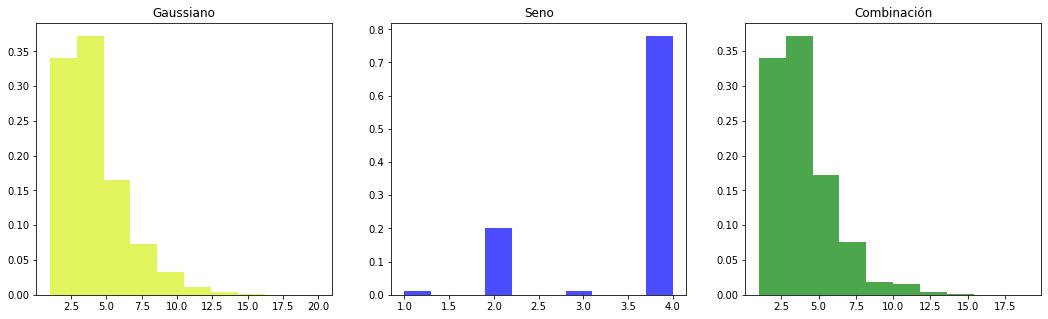

In [14]:
dist3 = show_deg_dist(sen_periodic2, random_ls2, comb_ls2)
dist3.savefig("assets/hvg/distb300.jpg", bbox_inches='tight')

Por la característica de la distribución del seno, vamos a hacer un pequeño estudio respecto al mismo

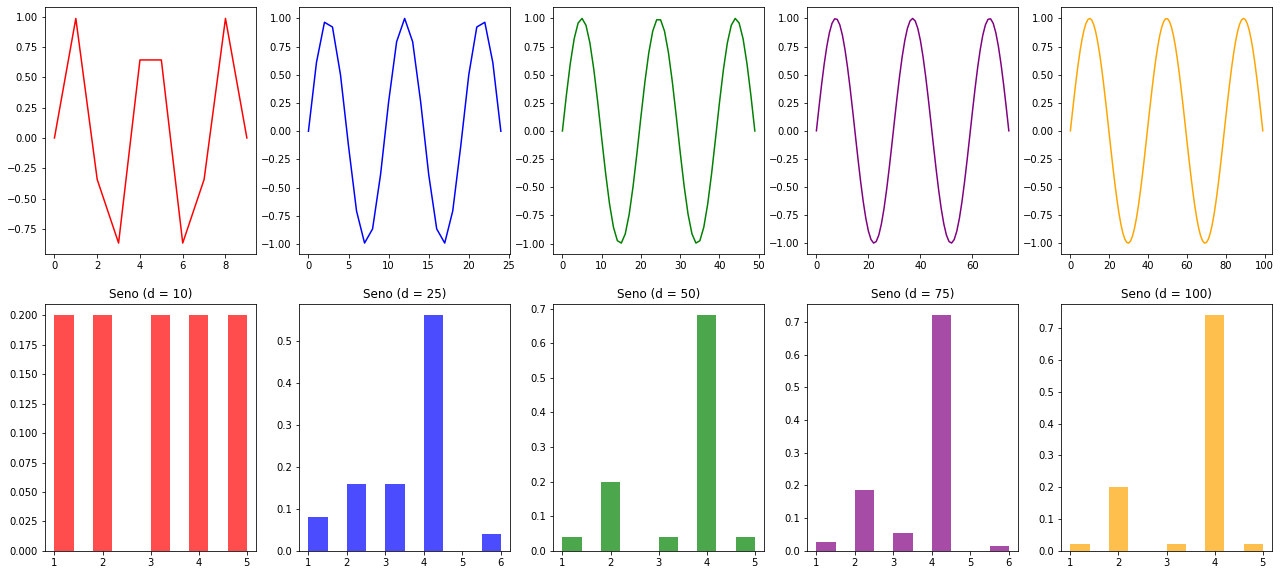

In [15]:
f, ax = plt.subplots(2, 5)
periodic = np.sin(np.linspace(0, 5*np.pi, 10))
lsSin = [HorizontalVisibilityGraph.fillsFromTimeSeries(i).nx for i in [periodic]]
degreesSin = [[d for n, d in g.degree()] for g in lsSin]
degreesSin = [item for row in degreesSin for item in row]
counts1, bins1 = np.histogram(degreesSin)
f.set_figheight(10)
f.set_figwidth(22)
ax[0][0].plot(periodic, color="red")
ax[1][0].hist(bins1[:-1], bins1, weights=(1/sum(counts1))*np.array(counts1), alpha=.7, color="red")
ax[1][0].set_title("Seno (d = 10)")
periodic = np.sin(np.linspace(0, 5*np.pi, 25))
lsSin = [HorizontalVisibilityGraph.fillsFromTimeSeries(i).nx for i in [periodic]]
degreesSin = [[d for n, d in g.degree()] for g in lsSin]
degreesSin = [item for row in degreesSin for item in row]
counts1, bins1 = np.histogram(degreesSin)
ax[0][1].plot(periodic, color="blue")
ax[1][1].hist(bins1[:-1], bins1, weights=(1/sum(counts1))*np.array(counts1), alpha=.7, color="blue")
ax[1][1].set_title("Seno (d = 25)")
periodic = np.sin(np.linspace(0, 5*np.pi, 50))
lsSin = [HorizontalVisibilityGraph.fillsFromTimeSeries(i).nx for i in [periodic]]
degreesSin = [[d for n, d in g.degree()] for g in lsSin]
degreesSin = [item for row in degreesSin for item in row]
counts1, bins1 = np.histogram(degreesSin)
ax[0][2].plot(periodic, color="green")
ax[1][2].hist(bins1[:-1], bins1, weights=(1/sum(counts1))*np.array(counts1), alpha=.7, color="green")
ax[1][2].set_title("Seno (d = 50)")
periodic = np.sin(np.linspace(0, 5*np.pi, 75))
lsSin = [HorizontalVisibilityGraph.fillsFromTimeSeries(i).nx for i in [periodic]]
degreesSin = [[d for n, d in g.degree()] for g in lsSin]
degreesSin = [item for row in degreesSin for item in row]
counts1, bins1 = np.histogram(degreesSin)
ax[0][3].plot(periodic, color="purple")
ax[1][3].hist(bins1[:-1], bins1, weights=(1/sum(counts1))*np.array(counts1), alpha=.7, color="purple")
ax[1][3].set_title("Seno (d = 75)")
periodic = np.sin(np.linspace(0, 5*np.pi, 100))
lsSin = [HorizontalVisibilityGraph.fillsFromTimeSeries(i).nx for i in [periodic]]
degreesSin = [[d for n, d in g.degree()] for g in lsSin]
degreesSin = [item for row in degreesSin for item in row]
counts1, bins1 = np.histogram(degreesSin)
ax[0][4].plot(periodic, color = "orange")
ax[1][4].hist(bins1[:-1], bins1, weights=(1/sum(counts1))*np.array(counts1), alpha=.7, color="orange")
ax[1][4].set_title("Seno (d = 100)")
plt.savefig("assets/hvg/evolution_sin.jpg", bbox_inches='tight')

Ocurre lo anterior por la discretización. Si se toma cada posible valor del eje $x_i$, es evidente que a medida que se vaya haciendo la malla más fina, va a tener siempre como vecinos a los $x_{i-1}$, $x_{i+1}$. Por ser una función periódica, y simétrica respecto de cada valle entre periodos, seguro que también tiene visibilidad con "el valor que tiene enfrente", es decir $x_{i} + \frac{\pi}{2}$. Pero, por cómo crea la linealización numpy, parece que no solo ve a su simétrico, si no también a su vecino. En la memoria se desarrollará esto con un dibujo.

### Conclusiones

En este primer experimento se ha estudiado la propiedad de "escala libre". Como se ha visto en el artículo, las series aleatorias (en este caso, el ruido) sí que siguen dicha propiedad, con una distribución tal que $k \rightarrow \infty  \Rrightarrow P(k) \rightarrow 0$. No es el caso del seno, como hemos visto. Esto se debe a la forma del mismo (todos los valles van a tener los mismos vecinos, pero los máximos y los mínimos solo van a ver a uno de los dos lados) y a la discretización que hace numpy.

## Crecimiento de la longitud de camino por el número de nodos <a id='len'></a>
En las siguientes celdas vamos a estudiar si los HVGs del seno, el ruido blanco gaussiano y su combinación cumplen la propiedad del mundo pequeño, i.e, si el crecimiento de la longitud de camino por el número de nodos es logarítmico. Vamos a hacer el estudio para grafos de 30 a 200, 500 y 750 nodos. Los cómputos de esta sección no se recomiendan repetir, por la complejidad computacional de los distintos métodos. Por el bien de la reproducibilidad, los resultados de las siguientes expresiones se han guardado en ficheros, cuyo método de lectura se dispondrá en el README.md de este repositorio.

#### Experimento de 30 a 200 nodos

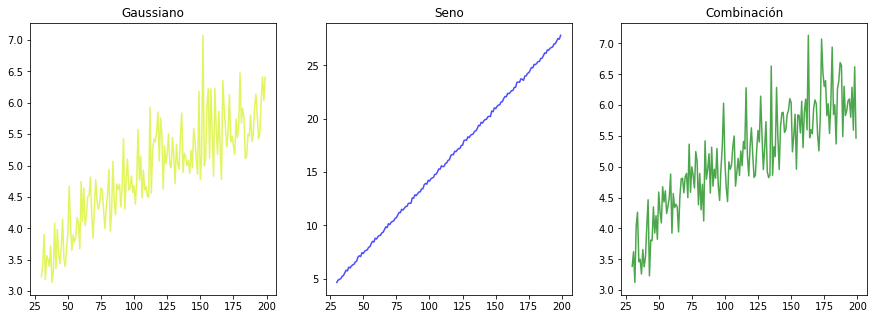

In [34]:
lp30_200 = show_lenght_path(30, 200)
lp30_200.savefig("assets/hvg/lengh_path30_200.jpg", bbox_inches='tight')

#### Experimento de 30 a 500 nodos

In [ ]:
lp30_500 = show_lenght_path(30, 500)
lp30_500.savefig("assets/hvg/lengh_path30_500.jpg", bbox_inches='tight')

#### Experimento de 30 a 750 nodos

In [ ]:
lp30_750 = show_lenght_path(30, 750)
lp30_750.savefig("assets/hvg/lengh_path30_750.jpg", bbox_inches='tight')

### Conclusiones

Las conclusiones de este experimento sí que concuerdan con lo visto en el artículo. La serie aleatoria de ruido cumple la propiedad del mundo pequeño, como era de esperar, mientras que la serie periódica tiene un crecimiento lineal de la longitud media del camino con respecto al crecimiento en el número de nodos.

## Estudio de medidas de centralidad para series periodicas y de ruido <a id='cent'></a>
En este apartado se ha pretendido ampliar lo que se muestra en el paper original de Lacasa, y estudiar también distintas medidas de centralidad (_eigenvector_, _closeness_ y _betweeness_) sobre las series con las que se está trabajando. Esta idea surge en un intento de seguir descifrando las propiedades analíticas de la serie de ruido blanco gaussiano y el seno. Los experimentos van a ser para varias instancias del ruido y del seno. Hasta ahora el seno siempre iba de $[0, 5 \pi]$. En estos experimentos eso va a cambiar, para ampliar la serie.

#### Experimento para $n = 200$ elementos en la serie temporal, con $sen \in [0, 5 \pi]$

In [18]:
periodic1 = np.sin(np.linspace(0, 5*np.pi, 200))
random1 = white_noise(200)

Caso $\alpha = 0.1$

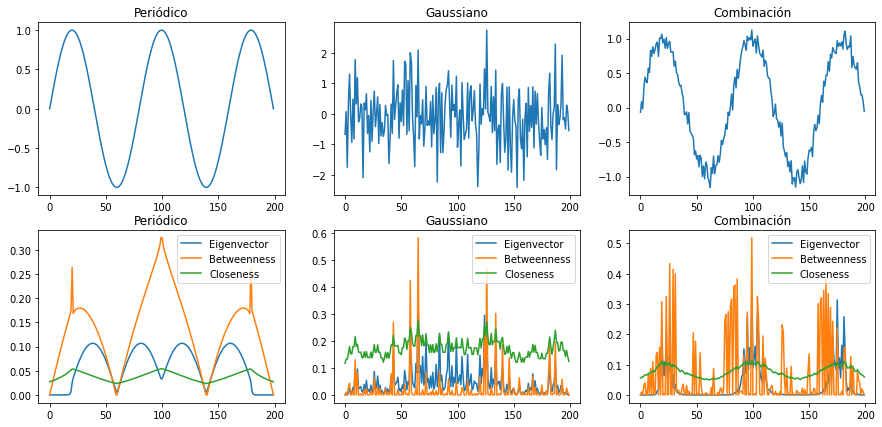

In [19]:
cents11 = show_centrality(periodic1, random1, 0.1, max_iter = 10000)
cents11.savefig("assets/hvg/centralityn200alpha01.jpg", bbox_inches='tight')

Exploración con un 0.3 de ruido en la combinación de las centralidades

Caso $\alpha = 0.4$

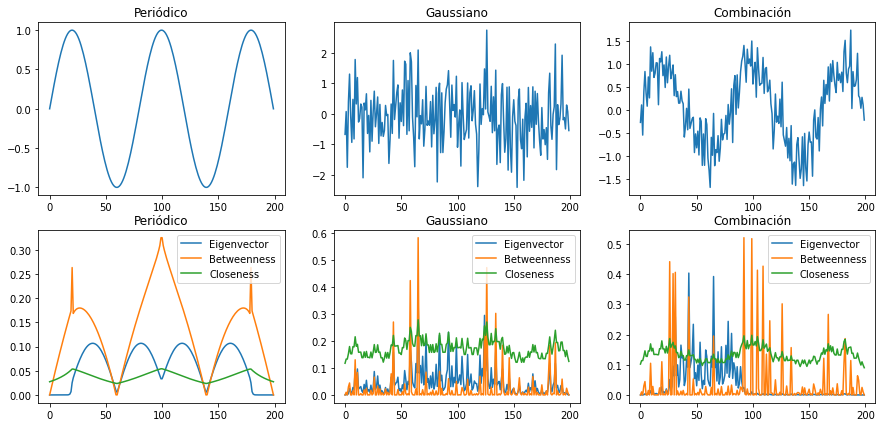

In [20]:
cents12 = show_centrality(periodic1, random1, 0.4, max_iter = 10000)
cents12.savefig("assets/hvg/centralityn200alpha04.jpg", bbox_inches='tight')

Caso $\alpha = 0.8$

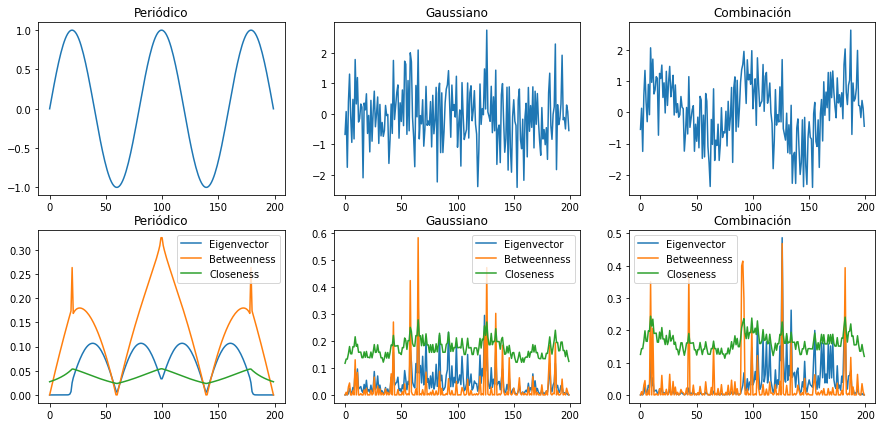

In [21]:
cents13 = show_centrality(periodic1, random1, 0.8, max_iter = 10000)
cents13.savefig("assets/hvg/centralityn200alpha08.jpg", bbox_inches='tight')

Caso $\alpha = 1.2$

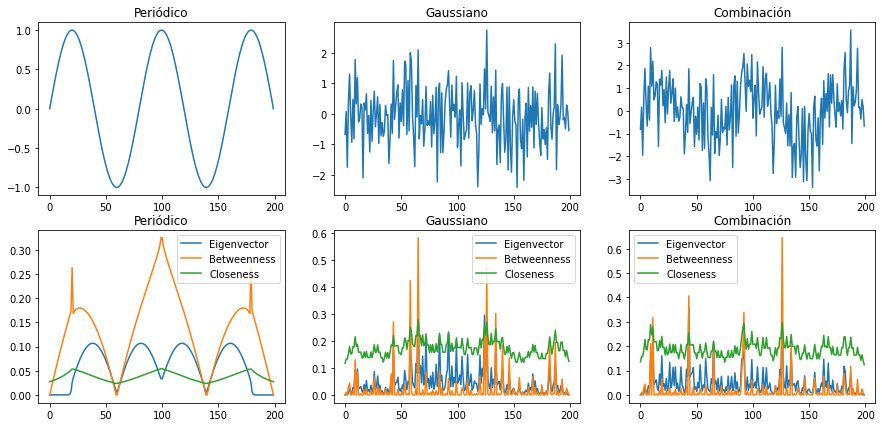

In [22]:
cents14 = show_centrality(periodic1, random1, 1.2, max_iter = 10000)
cents14.savefig("assets/hvg/centralityn200alpha12.jpg", bbox_inches='tight')

#### Experimento para $n = 500$ elementos en la serie temporal, con $sen \in [0, 8 \pi]$

In [23]:
periodic2 = np.sin(np.linspace(0, 8*np.pi, 500))
random2 = white_noise(500)

Caso $\alpha = 0.1$

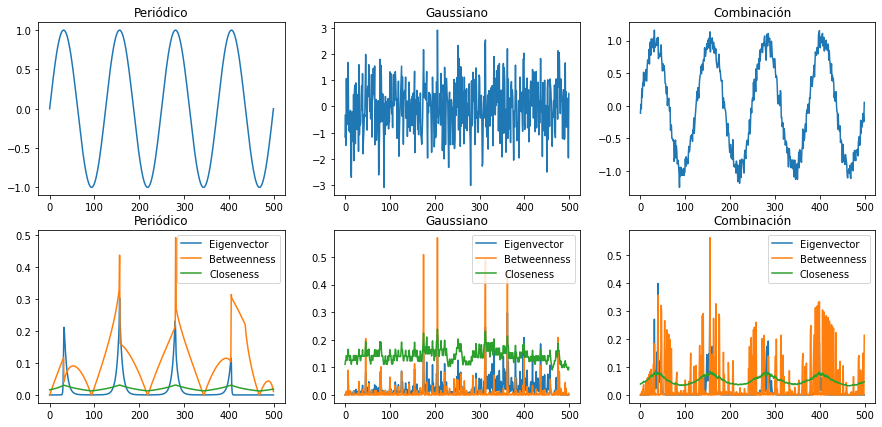

In [24]:
cents21 = show_centrality(periodic2, random2, 0.1, max_iter = 10000)
cents21.savefig("assets/hvg/centralityn500alpha01.jpg", bbox_inches='tight')

Exploración con un 0.3 de ruido en la combinación de las centralidades

Caso $\alpha = 0.4$

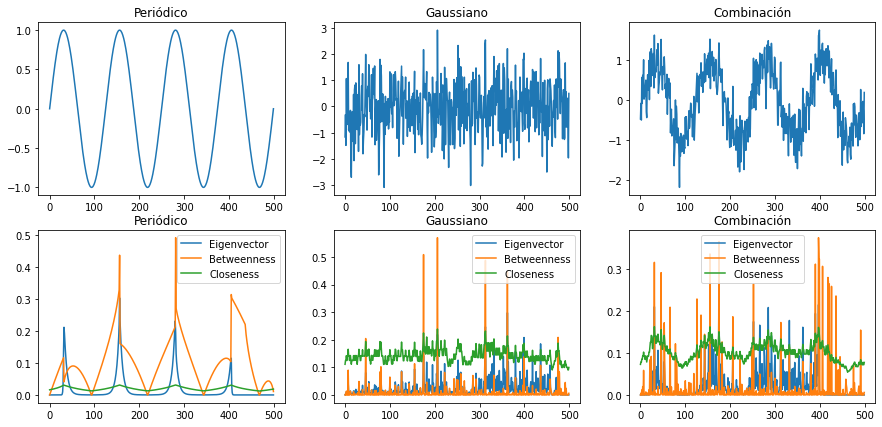

In [25]:
cents22 = show_centrality(periodic2, random2, 0.4, max_iter = 10000)
cents22.savefig("assets/hvg/centralityn500alpha04.jpg", bbox_inches='tight')

Caso $\alpha = 0.8$

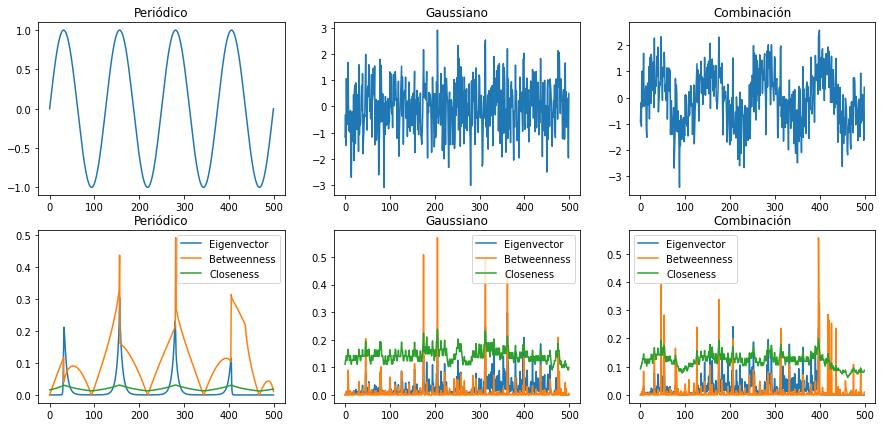

In [26]:
cents23 = show_centrality(periodic2, random2, 0.8, max_iter = 10000)
cents23.savefig("assets/hvg/centralityn500alpha08.jpg", bbox_inches='tight')

Caso $\alpha = 1.2$

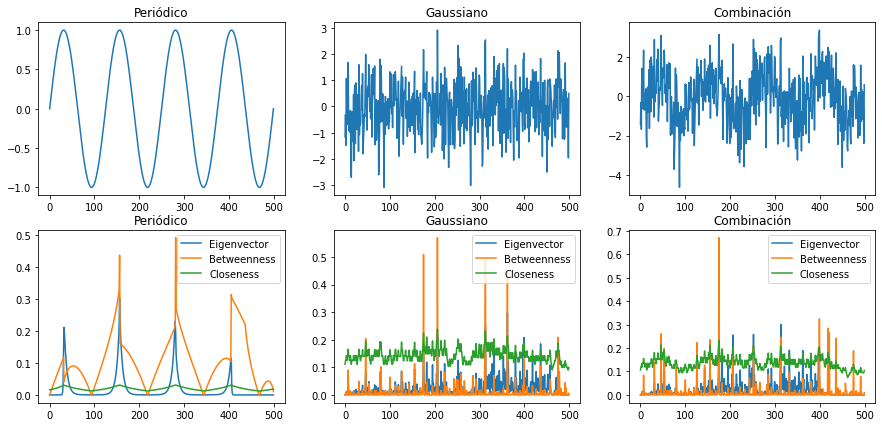

In [27]:
cents24 = show_centrality(periodic2, random2, 1.2, max_iter = 10000)
cents24.savefig("assets/hvg/centralityn500alpha12.jpg", bbox_inches='tight')

#### Experimento para $n = 1000$ elementos en la serie temporal, con $sen \in [0, 12 \pi]$

In [28]:
periodic3 = np.sin(np.linspace(0, 12*np.pi, 1000))
random3 = white_noise(1000)

Caso $\alpha = 0.1$

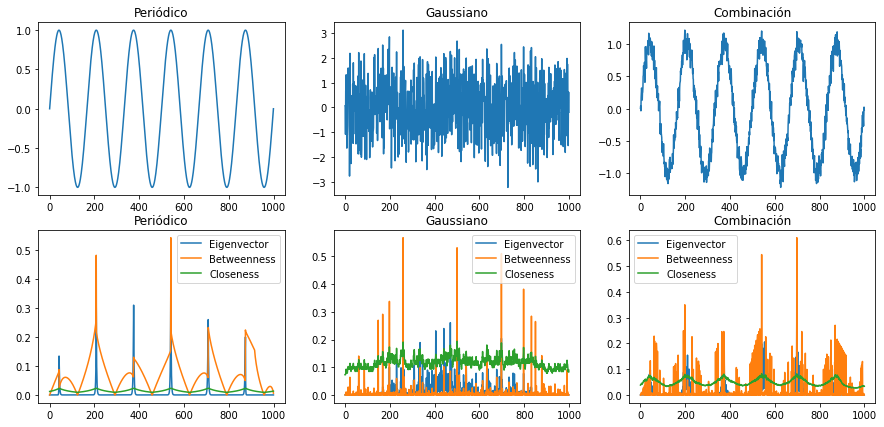

In [29]:
cents31 = show_centrality(periodic3, random3, 0.1, max_iter = 10000)
cents31.savefig("assets/hvg/centralityn1000alpha01.jpg", bbox_inches='tight')

Exploración con un 0.3 de ruido en la combinación de las centralidades

Caso $\alpha = 0.4$

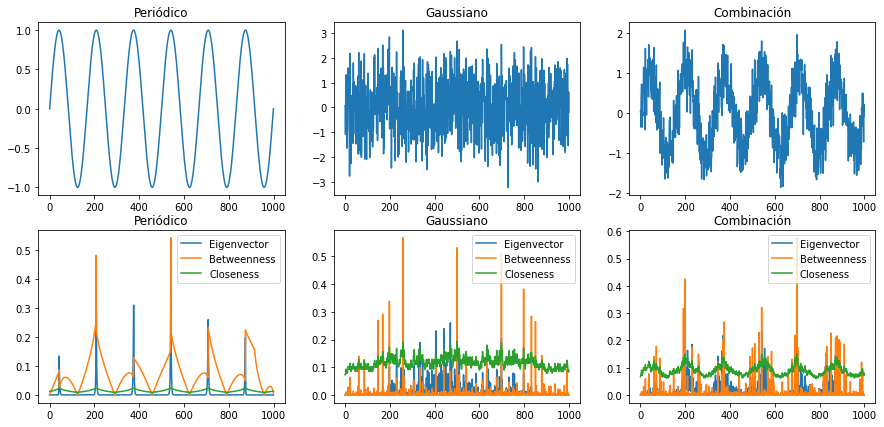

In [30]:
cents32 = show_centrality(periodic3, random3, 0.4, max_iter = 10000)
cents32.savefig("assets/hvg/centralityn1000alpha04.jpg", bbox_inches='tight')

Caso $\alpha = 0.8$

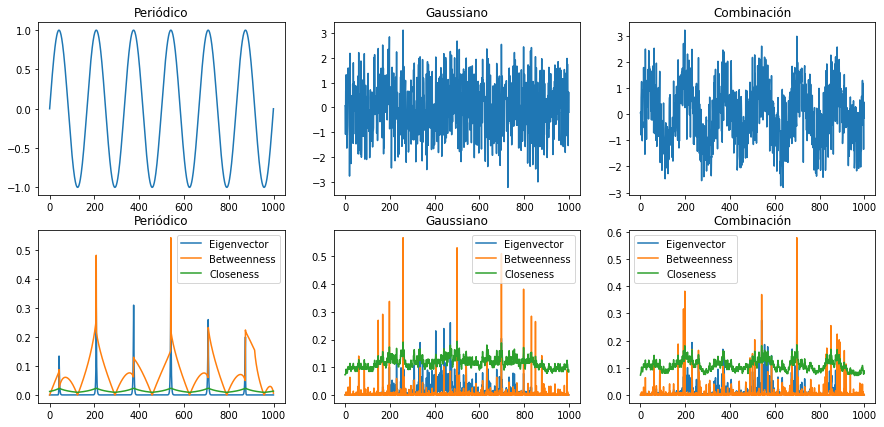

In [31]:
cents33 = show_centrality(periodic3, random3, 0.8, max_iter = 10000)
cents33.savefig("assets/hvg/centralityn1000alpha08.jpg", bbox_inches='tight')

Caso $\alpha = 1.2$

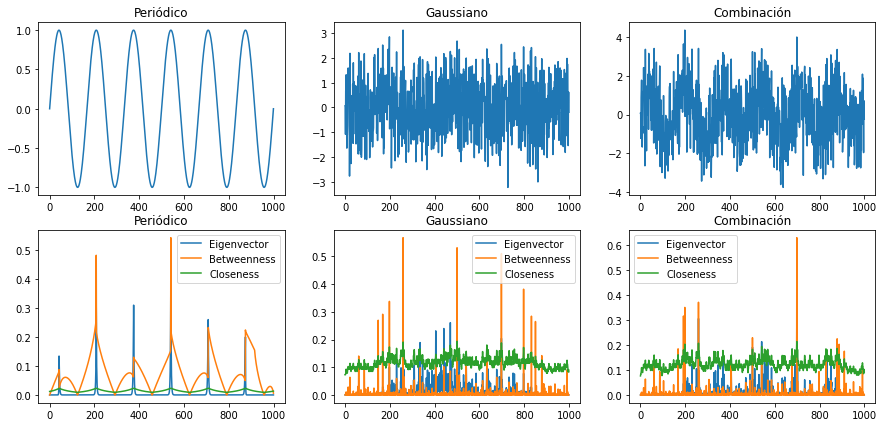

In [32]:
cents34 = show_centrality(periodic3, random3, 1.2, max_iter = 10000)
cents34.savefig("assets/hvg/centralityn1000alpha12.jpg", bbox_inches='tight')

### Conclusiones

Este experimento ha resultado bastante interesante. Para series generadas artificialmente se ve que la periocidad se "hereda" (relativamente) en las gráficas de centralidad (siendo la que mejor se comporta la _closeness_). Esto da un indicativo de que podría darse la detección de ruido en series periódicas a través del estudio de una serie temporal como su HVG, utilizando las medidas de centralidad para detectar el ruido.

# HVG $\subset$ GAF <a id='hvgingaf'></a>

En esta sección se presenta el algoritmo de conversión de Gramian Angular Field en un Horizontal Visibility Graph. A pesar de ser un algoritmo exacto, es decir, no aproxima, por la ausencia de demostración de que la matriz del Gramian Angular Difference (sin) Field contiene la del HVG, se adjuntan aquí los experimentos que demuestran exactamente eso. Primero, el algoritmo:

![alternative text](assets/hvg/algo.png)

Este algoritmo viene implementado en la librería que hemos desarrollado en este trabajo, dentro de las _Utilities_. Para esto vamos a generar 1000 series aleatorias de ruido blanco, a computar su HVG, su GADF (que se puede definir dentro de la clase GramianAngularField) y restar las entradas de la matriz, viendo así si es 0.

In [33]:
res = 0
for i in range(1000):
    time_series = np.abs(white_noise(100))
    horizontal = HorizontalVisibilityGraph.fillsFromTimeSeries(time_series)
    gramian = GramianAngularField(series = time_series, I = [0, 1])
    tgadf = gramian_projection(gramian)
    res += sum(sum(np.abs(horizontal.to_np() - tgadf.to_np())))
print(res)

0
